| Package Dependencies | version | 
|------|------|
|  numpy            |         1.17.5            | 
|  pandas           |         1.0.5  |
|  seaborn           |        0.11.2  | 
|  clustalw             |      2.1   | 
|  bokeh          |           2.4.3          | 
|  biopython      |           1.7            | 
|  matplotlib       |          3.2.2           | 


| File Dependencies | download link| md5sum | 
|------|------|------|
|  211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta.gz    |  https://projects.au.dk/fileadmin/projects/fabagenome/211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta.gz            |  35f6201a63c9dad049c060477f64bbfa             | 
|  HEDIN_TMP5.check.renamed.phase.complete_CDS.fa           |         https://projects.au.dk/fileadmin/ingen_mappe_valgt/HEDIN_TMP5.check.renamed.phase.complete_CDS.fa  |ced3cc7c446dcb0d5a974213e42e4a23   |
|  HEDIN_TMP5.check.renamed.phase.complete.gff3           |        https://projects.au.dk/fileadmin/ingen_mappe_valgt/HEDIN_TMP5.check.renamed.phase.complete.gff3    | fdd7c3bd28f23f6544f997256ef4736a    | 
|  Supplementary_Data_1          | https://doi.org/10.1038/s41477-021-00950-w|     | 
|  VC1_cDNA_Hedin.fa          |   https://gitfront.io/r/user-2379081/t9iSJfQxyzxG/FabaVC1-Proposal/blob/VC1_cDNA_Hedin.fa  | sequence originated from supplementary_data_6.docx from https://doi.org/10.1038/s41477-021-00950-w |

#### To run a standalone version of Cas-Designer follow installation instructions:     http://www.rgenome.net/cas-designer/portable
> Make sure to export path to the folder that contains the cas-offinder and cas-offinder-bulge dependecies   
`ex.)  export PATH="$PATH:/home/jayakod1/OneDriveMSU/JobApps/Aarhus/"`  


###  VC1 in Hedin/2 
> Blast known Hedin/2 VC1 cDNA sequence from supplementary_data_6.docx against complete CDS annotation and the transcripts in Supplementary_Data_1.fa  

- create blastdb for HEDIN_TMP5.check.renamed.phase.complete_CDS.fa and Supplementary_Data_1 in command line:  

`ex.) makeblastdb -in HEDIN_TMP5.check.renamed.phase.complete_CDS.fa -dbtype nucl -parse_seqids -out Hedin_CDS`  

`ex.) makeblastdb -in Supplementary_Data_1.fa -dbtype nucl -parse_seqids -out Hedin_supp`

In [28]:
#Note to self: conda environment where packages are installed = "blast"
#Note to self:python kernel for jupyter notebook = "blast(python 3.8.5)"

#Just loading the standard stuff
# Show plots as part of the notebook 
%matplotlib inline
import matplotlib.pyplot as plt

# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns



#### Find evgLocus_1250620 sequence in transcript assembly
> take a quick look for any other homologous sequences in the top hits
>> evgLocus_1250615?	 &#x1F440;

In [8]:
# Import Biopython tools for running BLASTn locally
from Bio.Blast.Applications import NcbiblastnCommandline

#create commandline for blastn -> find VC1 from the transcript assemblies
blastn_Hedin_supp = NcbiblastnCommandline (query='VC1_cDNA_Hedin.fa', out='VC1_cDNA_Hedin_supp_blastout.txt', outfmt=6, db='Hedin_supp')
print(blastn_Hedin_supp) #check what the command line looks like 
# Run BLASTn, and print STDOUT/STDERR
stdout_Hedin_supp, stderr_Hedin_supp = blastn_Hedin_supp()

# Check STDOUT, STDERR - if it  ran with no errors, we should see nothing print for the stdout and error
print("STDOUT: %s" % stdout_Hedin_supp)
print("STDERR: %s" % stderr_Hedin_supp)

blastn -out VC1_cDNA_Hedin_supp_blastout.txt -outfmt 6 -query VC1_cDNA_Hedin.fa -db Hedin_supp
STDOUT: 
STDERR: 


In [5]:
# Read BLASTn output
results_Hedin_supp= pd.read_csv('VC1_cDNA_Hedin_supp_blastout.txt', sep="\t", header=None)

# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results_Hedin_supp.columns = headers

# Inspect modified table
results_Hedin_supp.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,evgLocus_1250620,100.000,1509,0,0,36,1544,1,1509,0.000000e+00,2787
1,VC1_cDNA_Hedin,evgLocus_1250615,92.759,1312,87,4,272,1575,246,1557,0.000000e+00,1890
2,VC1_cDNA_Hedin,evgLocus_1250615,100.000,87,0,0,92,178,48,134,1.230000e-38,161
3,VC1_cDNA_Hedin,evgLocus_1029397,83.955,1234,196,2,276,1508,316,1548,0.000000e+00,1181


#### Save evgLocus_1250620 sequence as a fasta

In [17]:
##pull out sequences for asm tophits

from Bio import SeqIO                                                               
import sys   


subjectID=["evgLocus_1250620"]                                       
#read in Hedin/2 transcripts                                                                              
Hedin_transcripts = SeqIO.parse("Supplementary_Data_1.fa", 'fasta')                                    
with open("evgLocus_1250620.fasta", "w") as output_handle:
    SeqIO.write((seq for seq in Hedin_transcripts if seq.id in subjectID), output_handle, "fasta")

##### Which gene-models is VC1 in the annotation?

In [42]:
#create commandline for blastn -> which gene models in the annotation?
blastn_Hedin_CDS = NcbiblastnCommandline (query='VC1_cDNA_Hedin.fa', out='VC1_cDNA_Hedin_cds_blastout.txt', outfmt=6, db='Hedin_CDS')
print(blastn_Hedin_CDS) #check what the command line looks like 
# Run BLASTn, and print STDOUT/STDERR
stdout_Hedin_CDS, stderr_Hedin_CDS = blastn_Hedin_CDS()

# Check STDOUT, STDERR - if it  ran with no errors, we should see nothing print for the stdout and error
print("STDOUT: %s" % stdout_Hedin_CDS)
print("STDERR: %s" % stderr_Hedin_CDS)


blastn -out VC1_cDNA_Hedin_cds_blastout.txt -outfmt 6 -query VC1_cDNA_Hedin.fa -db Hedin_CDS
STDOUT: 
STDERR: 


In [43]:
# Read BLASTn output
results_Hedin_CDS = pd.read_csv('VC1_cDNA_Hedin_cds_blastout.txt', sep="\t", header=None)

# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results_Hedin_CDS.columns = headers

# Inspect modified table
results_Hedin_CDS.head()


,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485560.1,100.00,1509,0,0,36,1544,1,1509,0.000000e+00,2787
1,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485520.1,100.00,1509,0,0,36,1544,1,1509,0.000000e+00,2787
2,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485480.1,100.00,1509,0,0,36,1544,1,1509,0.000000e+00,2787
3,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.Ung108560.1,92.53,1312,90,4,272,1575,246,1557,0.000000e+00,1873
4,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.Ung108560.1,100.00,87,0,0,92,178,48,134,1.300000e-38,161


>>Vfaba.Hedin2.R1.Ung108560.1	== evgLocus_1250615 ? &#x1F914;	

##### Are there are 3 copies of VC1 in Hedin/2? 

In [47]:
#pull out only the top hits
top_results_Hedin_CDS=results_Hedin_CDS.drop(results_Hedin_CDS[results_Hedin_CDS['pc_identity'] < 95].index).drop(results_Hedin_CDS[results_Hedin_CDS['aln_length'] < 1000].index)
top_results_Hedin_CDS

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485560.1,100.0,1509,0,0,36,1544,1,1509,0.0,2787
1,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485520.1,100.0,1509,0,0,36,1544,1,1509,0.0,2787
2,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485480.1,100.0,1509,0,0,36,1544,1,1509,0.0,2787


#### CNV? 


##### Save VC1 gene models from annotation as fasta

In [ ]:
##pull out sequences from CDS annotation and save as fasta

from Bio import SeqIO                                                               
import sys   

#create a list of subject IDs for top hits
top_results_Hedin_CDS_subjectID=top_results_Hedin_CDS['subject'].tolist()
top_results_Hedin_CDS_subjectID
                                        
#read in Hedin/2 CDS annotation                                                                                    
Hedin_CDS = SeqIO.parse("./faba_genome_paper/HEDIN_TMP5.check.renamed.phase.complete_CDS.fa", 'fasta')                                    
with open("top_results_Hedin_CDS_subjectID.fasta", "w") as output_handle:
    SeqIO.write((seq for seq in Hedin_CDS if seq.id in top_results_Hedin_CDS_subjectID), output_handle, "fasta")

#### Read Hedin2 gff3

In [45]:
# Read Hedin2 gff3
headers=['seqid', 'source', 'type', 'start', 'end', 'score ', 'strand', 'phase', 'attributes']
Hedin_gff3 = pd.read_table('HEDIN_TMP5.check.renamed.phase.complete.gff3', comment='#', sep="\t", names=headers)
  

#### find VC1 gene models in annotatio
> Ya, looks like we got 3 copies in tandem. One on the positive and two on the reverse strand

In [49]:
#find gene models in annotation
#create a list of subject IDs for top hits
top_results_Hedin_CDS_subjectID=top_results_Hedin_CDS['subject'].tolist()
top_results_Hedin_CDS_subjectID

#create a mask for the annotation dataframe using a regex (|) from the list of gene model names
mask=Hedin_gff3["attributes"].str.contains('|'.join(top_results_Hedin_CDS_subjectID)) 
Hedin_gff3_topresults=Hedin_gff3[mask] #apply mask
Hedin_gff3_topresults


,seqid,source,type,start,end,score,strand,phase,attributes
72519,chr1L,Liftoff,mRNA,1759261218,1759263557,.,+,.,ID=Vfaba.Hedin2.R1.1g485480.1;Parent=Vfaba.Hed...
72520,chr1L,Liftoff,exon,1759261218,1759261276,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72521,chr1L,Liftoff,exon,1759261492,1759261753,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72522,chr1L,Liftoff,exon,1759261835,1759262056,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72523,chr1L,Liftoff,exon,1759262265,1759262587,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72524,chr1L,Liftoff,exon,1759262751,1759262880,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72525,chr1L,Liftoff,exon,1759262950,1759263246,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72526,chr1L,Liftoff,exon,1759263342,1759263557,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72527,chr1L,Liftoff,CDS,1759261218,1759261276,.,+,0,Parent=Vfaba.Hedin2.R1.1g485480.1
72528,chr1L,Liftoff,CDS,1759261492,1759261753,.,+,1,Parent=Vfaba.Hedin2.R1.1g485480.1


> Quick check: look for gene models in genome browser 
>> tandem

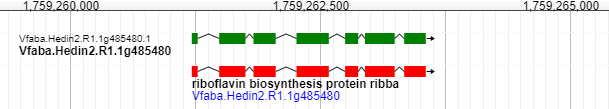

In [24]:
from IPython.core.display import Image
Image("Vfaba.Hedin2.R1.1g485480.1_genemodel2.png")


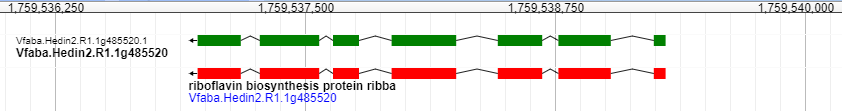

In [25]:
Image("Vfaba.Hedin2.R1.1g485520.1_genemodel2.png")

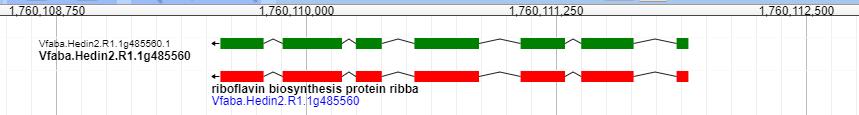

In [26]:
Image("Vfaba.Hedin2.R1.1g485560.1_genemodel2.png")

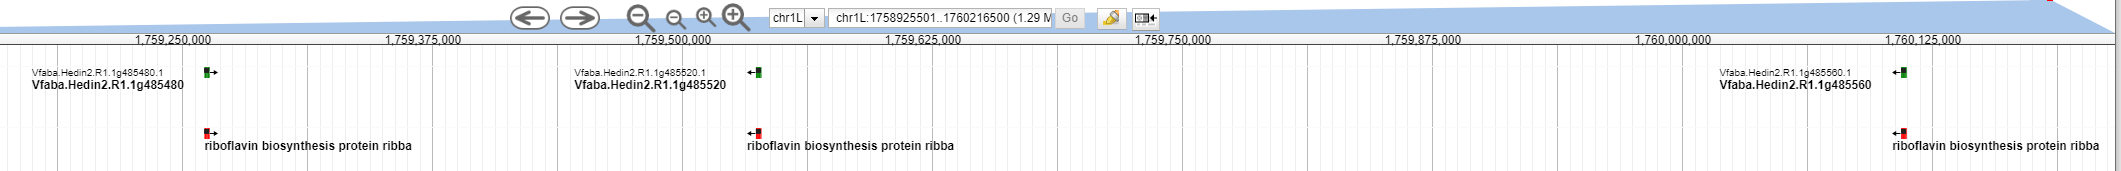

In [8]:
Image("Hedin_chr1L_VC1.PNG")

###  Multiple Sequence Alignment of VC1 gene models and cDNA


##### Take all the VC1 sequences and do a multiple sequence alignment
> ***Run jupyternotebook to interact with MSA viewer 

In [27]:
#Setting up some functions for running and visualizing multiple sequencing alignments

def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]    
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)    
    N = len(seqs[0])
    S = len(seqs)    
    width = .4

    x = np.arange(1,N+1)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100 
    else:
        viewlen=N
###########change to view window of interest
    view_range = (0,viewlen) 
    tools="xpan, xwheel_zoom, reset, save"

    #entire sequence view (no text, with zoom)
    p = figure(title=None, plot_width= plot_width, plot_height=50,
               x_range=x_range, y_range=(0,S), tools=tools,
               min_border=0, toolbar_location='below')
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                 line_color=None, fill_alpha=0.8)
    p.add_glyph(source, rects)
    p.yaxis.visible = False
    p.grid.visible = False  

    #sequence text view with ability to scroll along x axis
    p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)          
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="helvetica",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.6)
    p1.add_glyph(source, glyph)
    p1.add_glyph(source, rects)

    p1.grid.visible = False
    p1.xaxis.major_label_text_font_style = "bold"
    
    
    p1.yaxis.major_label_text_color = "black"
    p1.yaxis.major_label_text_font_style = "bold"
    p1.yaxis.major_label_text_font = "tahoma"

    p1.yaxis.minor_tick_line_width = 0
    p1.yaxis.major_tick_line_width = 0

    p = gridplot([[p],[p1]], toolbar_location='below')
    return p


def get_colors(seqs):
    """make colors for bases in sequence"""
    text = [i for s in list(seqs) for i in s]
    clrs =  {'A':'#009E73','T':'#CC79A7','G':'orange','C':'#56B4E9','-':'white'}

    colors = [clrs[i] for i in text]
    return colors

def muscle_alignment(seqs):
    """Align 2 sequences with muscle"""
    filename = 'temp.faa'
    SeqIO.write(seqs, filename, "fasta")
    name = os.path.splitext(filename)[0]
    from Bio.Align.Applications import MuscleCommandline
    cline = MuscleCommandline(input=filename, out=name+'.txt')
    stdout, stderr = cline()
    align = AlignIO.read(name+'.txt', 'fasta')
    return align


def clustal_alignment(seqs):
    """Align multiple sequences present in a single fasta file using clustalW2"""
    in_file = seqs
    out_file = in_file.replace(".fasta", "_aln")
    from Bio.Align.Applications import ClustalwCommandline
    clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file, outfile=out_file, outorder= 'INPUT')
    # Run clustalw, and catch STDOUT/STDERR
    stdout_clustalw_Hedin_CDS, stderr_clustalw_Hedin_CDS = clustalw_cline() 
    print("Aligned!")


In [24]:
#combine top hits fasta from cds annotation with query (VC1_cDNA sequence) into a single fasta for a MSA
filenames = ['top_results_Hedin_CDS_subjectID.fasta', 'VC1_cDNA_Hedin.fa', 'evgLocus_1250620.fasta' ]
with open('top_results_Hedin_CDS_subjectID_MSA.fasta', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [28]:
#MSA of top hits using commandline wrapper for clustalw       
clustal_alignment("top_results_Hedin_CDS_subjectID_MSA.fasta")


Aligned!


> ***Run this cell to scroll through entire alignment

In [29]:
#Visualize alignment 
import os, io, random
import string
import numpy as np

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO

import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot


from Bio import AlignIO
aln = AlignIO.read("top_results_Hedin_CDS_subjectID_MSA_aln", "clustal")
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)

Bokeh(Column)

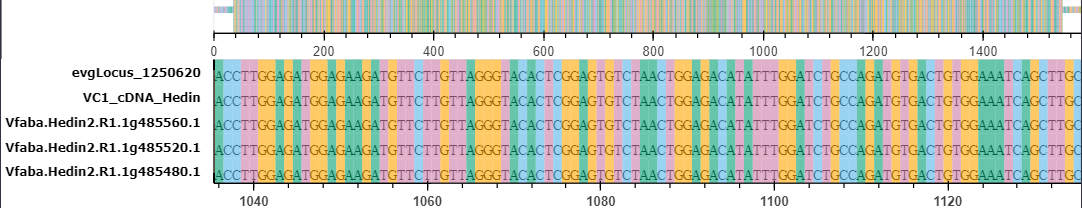

In [32]:
#screenshot of bokeh plot viewer
Image('top_results_Hedin_CDS_subjectID_MSA_aln.png')